In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
df.rename(columns={'male':'Gendermale'},inplace=True)
df.columns

Index(['Gendermale', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.isnull().sum()

Gendermale           0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.nunique()

Gendermale            2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [7]:
median=df.education.median()

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

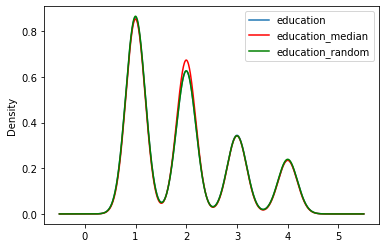

In [9]:
impute_nan(df,"education",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['education'].plot(kind='kde', ax=ax)
df.education_median.plot(kind='kde', ax=ax, color='red')
df.education_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [10]:
median=df.cigsPerDay.median()

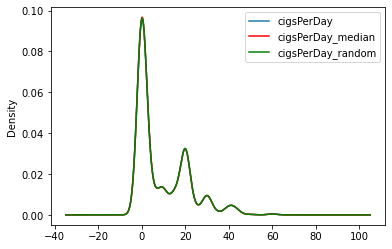

In [11]:
impute_nan(df,"cigsPerDay",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['cigsPerDay'].plot(kind='kde', ax=ax)
df.cigsPerDay_median.plot(kind='kde', ax=ax, color='red')
df.cigsPerDay_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
median=df.BPMeds.median()

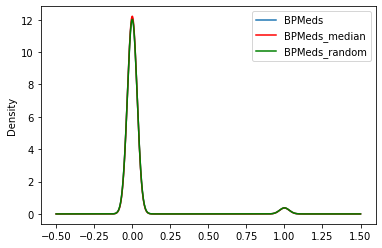

In [13]:
impute_nan(df,"BPMeds",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['BPMeds'].plot(kind='kde', ax=ax)
df.BPMeds_median.plot(kind='kde', ax=ax, color='red')
df.BPMeds_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [14]:
median=df.totChol.median()

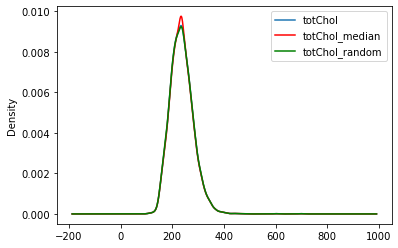

In [15]:
impute_nan(df,"totChol",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['totChol'].plot(kind='kde', ax=ax)
df.totChol_median.plot(kind='kde', ax=ax, color='red')
df.totChol_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
median=df.BMI.median()

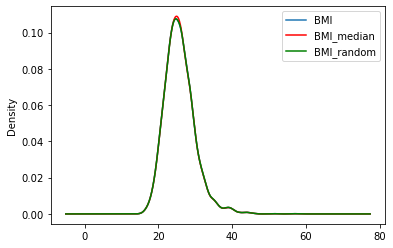

In [17]:
impute_nan(df,"BMI",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['BMI'].plot(kind='kde', ax=ax)
df.BMI_median.plot(kind='kde', ax=ax, color='red')
df.BMI_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
df['heartRate']=df['heartRate'].fillna(median)

In [19]:
median=df.glucose.median()

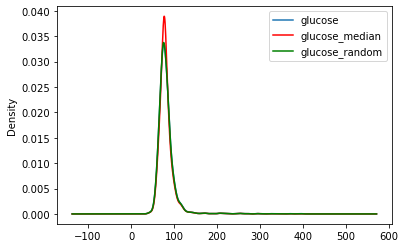

In [20]:
impute_nan(df,"glucose",median)
fig = plt.figure()
ax = fig.add_subplot(111)
df['glucose'].plot(kind='kde', ax=ax)
df.glucose_median.plot(kind='kde', ax=ax, color='red')
df.glucose_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
df.isnull().sum()

Gendermale             0
age                    0
education            105
currentSmoker          0
cigsPerDay            29
BPMeds                53
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol               50
sysBP                  0
diaBP                  0
BMI                   19
heartRate              0
glucose              388
TenYearCHD             0
education_median       0
education_random       0
cigsPerDay_median      0
cigsPerDay_random      0
BPMeds_median          0
BPMeds_random          0
totChol_median         0
totChol_random         0
BMI_median             0
BMI_random             0
glucose_median         0
glucose_random         0
dtype: int64

In [22]:
df.drop(["education", "education_median", "cigsPerDay", "cigsPerDay_median","BPMeds", "BPMeds_median", "totChol", "totChol_median", "BMI", "BMI_median", "glucose", "glucose_median"], axis = 1, inplace = True) 

In [23]:
df.columns

Index(['Gendermale', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'sysBP', 'diaBP', 'heartRate', 'TenYearCHD',
       'education_random', 'cigsPerDay_random', 'BPMeds_random',
       'totChol_random', 'BMI_random', 'glucose_random'],
      dtype='object')

In [24]:
dffin = df[['age', 'Gendermale', 'currentSmoker','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP','heartRate','education_random','cigsPerDay_random','BPMeds_random','totChol_random','BMI_random','glucose_random','TenYearCHD']] 
dffin.columns

Index(['age', 'Gendermale', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'sysBP', 'diaBP', 'heartRate', 'education_random',
       'cigsPerDay_random', 'BPMeds_random', 'totChol_random', 'BMI_random',
       'glucose_random', 'TenYearCHD'],
      dtype='object')

### Train Test Split

In [25]:
x=dffin.drop(['TenYearCHD'],axis=1)
y=dffin['TenYearCHD']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

## Models

### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test) 

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

### K-Nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

## Evaluation of Algorithms

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
mat=confusion_matrix(y_test,y_pred_gnb)
acc=accuracy_score(y_test,y_pred_gnb)
print(mat,acc)

[[667  52]
 [105  24]] 0.8148584905660378


In [33]:
mat=confusion_matrix(y_test,y_pred_dt)
acc=accuracy_score(y_test,y_pred_dt)
print(mat,acc)

[[596 123]
 [108  21]] 0.7275943396226415


In [34]:
mat=confusion_matrix(y_test,y_pred_rf)
acc=accuracy_score(y_test,y_pred_rf)
print(mat,acc)

[[711   8]
 [125   4]] 0.8431603773584906


In [35]:
mat=confusion_matrix(y_test,y_pred_knn)
acc=accuracy_score(y_test,y_pred_knn)
print(mat,acc)

[[693  26]
 [117  12]] 0.8313679245283019


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [37]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=500,cv=3,verbose=2,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7],
                                        'n_estimators': [50, 155, 261, 366, 472,
                                                         577, 683, 788, 894,
                                                         1000]},
                   verbose=2)

In [38]:
rf_randomcv.best_params_

{'n_estimators': 577,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

In [39]:
best_random_grid=rf_randomcv.best_estimator_

In [40]:
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

[[713   6]
 [124   5]]
Accuracy Score 0.8466981132075472


In [41]:
from joblib import dump
dump(best_random_grid,'RF Classifier')

['RF Classifier']